In [1]:
%load_ext autoreload
%autoreload 2

import analysis
import plotter
import matplotlib.pyplot as plt
import numpy as np

In [2]:
p = plotter.Plotter()
p.index

,Protein,I,Eps,Scale,Name,FullPath
0,12D_CPEB4_D4,100,80.0,1.0,1.0ls-100I-80e,/home/adria/data/prod/lammps/12D_CPEB4_D4/1.0l...
1,12D_CPEB4_D4x2,100,80.0,1.0,12D_CPEB4_D4x2,/home/adria/data/prod/lammps/12D_CPEB4_D4x2
2,12D_CPEB4_D4x50,100,80.0,1.0,T0,/home/adria/data/prod/lammps/12D_CPEB4_D4x50/T0
3,12D_CPEB4_D4x50,67,80.0,1.0,T1,/home/adria/data/prod/lammps/12D_CPEB4_D4x50/T1
4,7D_CPEB4,100,80.0,1.0,1.0ls-100I-80e,/home/adria/data/prod/lammps/7D_CPEB4/1.0ls-10...
5,7D_CPEB4x2,100,80.0,1.0,7D_CPEB4x2,/home/adria/data/prod/lammps/7D_CPEB4x2
6,7D_CPEB4x50,100,80.0,1.0,T0,/home/adria/data/prod/lammps/7D_CPEB4x50/T0
7,7D_CPEB4x50,67,80.0,1.0,T1,/home/adria/data/prod/lammps/7D_CPEB4x50/T1
8,CPEB4,100,80.0,1.0,1.0ls-100I-80e,/home/adria/data/prod/lammps/CPEB4/1.0ls-100I-80e
9,CPEB4_D4,100,80.0,1.0,1.0ls-100I-80e,/home/adria/data/prod/lammps/CPEB4_D4/1.0ls-10...


### 50 chains (REX)

In [26]:
d7 = analysis.Analysis(oliba_wd='/home/adria/data/prod/lammps/REX-7D_CPEB4x50')
wt = analysis.Analysis(oliba_wd='/home/adria/data/prod/lammps/REX-CPEB4x50')
wt_means, d7_means = [], []

d4 = analysis.Analysis(oliba_wd='/home/adria/data/prod/lammps/REX-CPEB4_D4x50')
d12 = analysis.Analysis(oliba_wd='/home/adria/data/prod/lammps/REX-12D_CPEB4_D4x50')
d4_means, d12_means = [], []

mbox = 0
for key in d4.box:
    mbox += np.abs(np.array(d4.box[key], dtype='float')).sum()
mbox=mbox/3
cutoff = 50

for T in range(12):
    clusters = wt.clusters(T, cutoff=cutoff)[0]
    f_clust=[]
    for clust in clusters:
        f_clust.append(len(clust))
    wt_means.append(f_clust)
    
    clusters = d7.clusters(T, cutoff=cutoff)[0]
    f_clust=[]
    for clust in clusters:
        f_clust.append(len(clust))
    d7_means.append(true_d)
    
    clusters = d4.clusters(T, cutoff=cutoff)[0]
    f_clust=[]
    for clust in clusters:
        f_clust.append(len(clust))
    d4_means.append(f_clust)
    
    clusters = d12.clusters(T, cutoff=cutoff)[0]
    f_clust=[]
    for clust in clusters:
        f_clust.append(len(clust))
    d12_means.append(f_clust)

> Run Completed at 13.46% for 7D_CPEB4. Ran 13455000 steps for a total of 2692 frames 


KeyboardInterrupt: 

In [3]:
cutoff=70

In [28]:
# DATA

wt = analysis.Analysis(oliba_wd='/home/adria/data/prod/lammps/REX-CPEB4x50/1.0ls-100I-80e')
wt_clusts_f = []
for T in range(12):
    clusters = wt.clusters(T, cutoff=cutoff)[0]
    f_clust=[]
    for clust in clusters:
        f_clust.append(len(clust))
    wt_clusts_f.append(f_clust)

> Run Completed at 34.45% for CPEB4. Ran 34450000 steps for a total of 690 frames 
<mdtraj.Trajectory with 657 frames, 22400 atoms, 22400 residues, and unitcells>
<mdtraj.Trajectory with 657 frames, 22400 atoms, 22400 residues, and unitcells>
<mdtraj.Trajectory with 657 frames, 22400 atoms, 22400 residues, and unitcells>
<mdtraj.Trajectory with 657 frames, 22400 atoms, 22400 residues, and unitcells>
<mdtraj.Trajectory with 657 frames, 22400 atoms, 22400 residues, and unitcells>
<mdtraj.Trajectory with 657 frames, 22400 atoms, 22400 residues, and unitcells>
<mdtraj.Trajectory with 657 frames, 22400 atoms, 22400 residues, and unitcells>
<mdtraj.Trajectory with 657 frames, 22400 atoms, 22400 residues, and unitcells>
<mdtraj.Trajectory with 657 frames, 22400 atoms, 22400 residues, and unitcells>
<mdtraj.Trajectory with 657 frames, 22400 atoms, 22400 residues, and unitcells>
<mdtraj.Trajectory with 657 frames, 22400 atoms, 22400 residues, and unitcells>
<mdtraj.Trajectory with 657 frames, 2

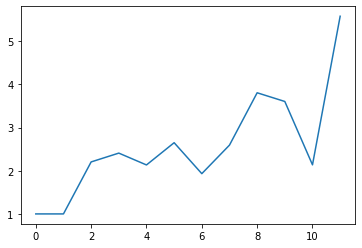

In [5]:
npwt = np.array(wt_clusts_f)
plt.plot(npwt.mean(axis=1))

In [1]:
# DATA

d7 = analysis.Analysis(oliba_wd='/home/adria/data/prod/lammps/REX-7D_CPEB4x50')
d7_clusts_f = []
for T in range(12):
    clusters = d7.clusters(T, cutoff=cutoff)[0]
    f_clust=[]
    for clust in clusters:
        f_clust.append(len(clust))
    d7_clusts_f.append(f_clust)

NameError: name 'analysis' is not defined

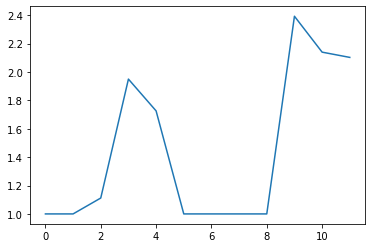

In [7]:
npd7 = np.array(d7_clusts_f)
plt.plot(npd7.mean(axis=1))

In [ ]:
# DATA
d12 = analysis.Analysis(oliba_wd='/home/adria/data/prod/lammps/REX-12D_CPEB4_D4x50')
d12_clusts_f = []
for T in range(12):
    clusters = d12.clusters(T, cutoff=cutoff)[0]
    f_clust=[]
    for clust in clusters:
        f_clust.append(len(clust))
    d12_clusts_f.append(f_clust)

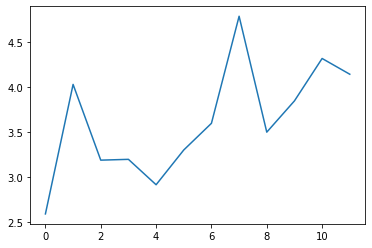

In [9]:
npd12 = np.array(d12_clusts_f)
plt.plot(npd12.mean(axis=1))

In [ ]:
# DATA
d4 = analysis.Analysis(oliba_wd='/home/adria/data/prod/lammps/REX-CPEB4_D4x50')
d4_clusts_f = []
for T in range(12):
    clusters = d4.clusters(T, cutoff=cutoff)[0]
    f_clust=[]
    for clust in clusters:
        f_clust.append(len(clust))
    d4_clusts_f.append(f_clust)

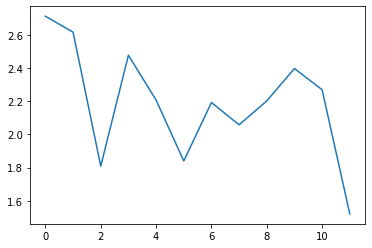

In [11]:
npd4 = np.array(d4_clusts_f)
plt.plot(npd4.mean(axis=1))

In [7]:
import mdtraj as md
md.load('/home/adria/data/prod/lammps/REX-7D_CPEB4x50/dcd_traj_0.dcd',top='/home/adria/data/prod/lammps/REX-7D_CPEB4x50/topo.pdb')

<mdtraj.Trajectory with 2692 frames, 22400 atoms, 22400 residues, and unitcells at 0x7ff67140b550>

In [ ]:
npd4 = np.array(d4_clusts_f)
npd12 = np.array(d12_clusts_f)
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(d4.get_temperatures(), npd4.mean(axis=1), label='D4', color='tab:orange')
ax.plot(d12.get_temperatures(), npd12.mean(axis=1), label='12D', color='tab:blue')
ax.set_xlabel("Temperature(K)")
ax.set_ylabel("<N Clusters>")
ax.legend()

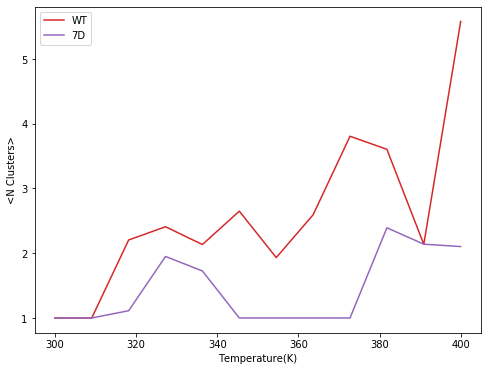

In [24]:
npwt = np.array(wt_clusts_f)
npd7 = np.array(d7_clusts_f)
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(wt.get_temperatures(), npwt.mean(axis=1), label='WT', color='tab:red')
ax.plot(d7.get_temperatures(), npd7.mean(axis=1), label='7D', color='tab:purple')
ax.set_xlabel("Temperature(K)")
ax.set_ylabel("<N Clusters>")
ax.legend()

In [25]:
d4.save_movies()
wt.save_movies()
d12.save_movies()
d7.save_movies()

<mdtraj.Trajectory with 100 frames, 22000 atoms, 22000 residues, and unitcells>
NFRAMES 100
<mdtraj.Trajectory with 100 frames, 22000 atoms, 22000 residues, and unitcells>
NFRAMES 100
<mdtraj.Trajectory with 100 frames, 22000 atoms, 22000 residues, and unitcells>
NFRAMES 100
<mdtraj.Trajectory with 100 frames, 22000 atoms, 22000 residues, and unitcells>
NFRAMES 100
<mdtraj.Trajectory with 100 frames, 22000 atoms, 22000 residues, and unitcells>
NFRAMES 100
<mdtraj.Trajectory with 100 frames, 22000 atoms, 22000 residues, and unitcells>
NFRAMES 100
<mdtraj.Trajectory with 100 frames, 22000 atoms, 22000 residues, and unitcells>
NFRAMES 100
<mdtraj.Trajectory with 100 frames, 22000 atoms, 22000 residues, and unitcells>
NFRAMES 100
<mdtraj.Trajectory with 100 frames, 22000 atoms, 22000 residues, and unitcells>
NFRAMES 100
<mdtraj.Trajectory with 100 frames, 22000 atoms, 22000 residues, and unitcells>
NFRAMES 100
<mdtraj.Trajectory with 100 frames, 22000 atoms, 22000 residues, and unitcells>
